# Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Data Loading and Basic *Setup*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/AI_ML_datasets/energy_data_set.csv'
df = pd.read_csv(file_path)

# Convert date column to datetime for time-series analysis
df['date'] = pd.to_datetime(df['date'])

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Mounted at /content/drive
Dataset loaded successfully!
Shape: (19735, 29)


# Basic Data Structure Exploration

In [3]:
print("=== BASIC DATA STRUCTURE ===")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nColumn Names:")
print(df.columns.tolist())

=== BASIC DATA STRUCTURE ===

First 5 rows:
                 date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.

# Missing Values Analysis

✅ No missing values found in the dataset!


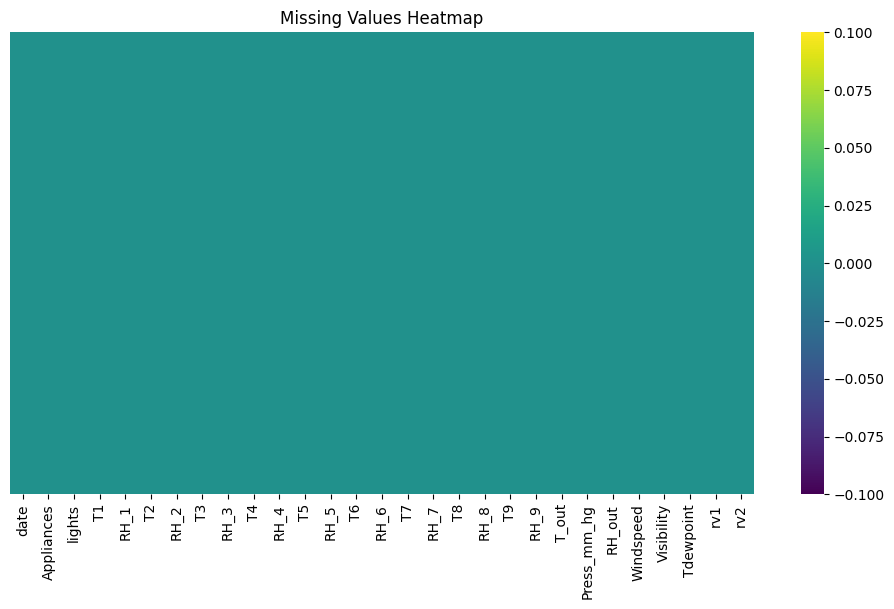

In [4]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
})

# Show only columns with missing values
missing_df_filtered = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df_filtered) > 0:
    print("Columns with missing values:")
    print(missing_df_filtered)
else:
    print("✅ No missing values found in the dataset!")

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Target Variable Analysis (Appliances Energy)

=== TARGET VARIABLE ANALYSIS (Appliances) ===


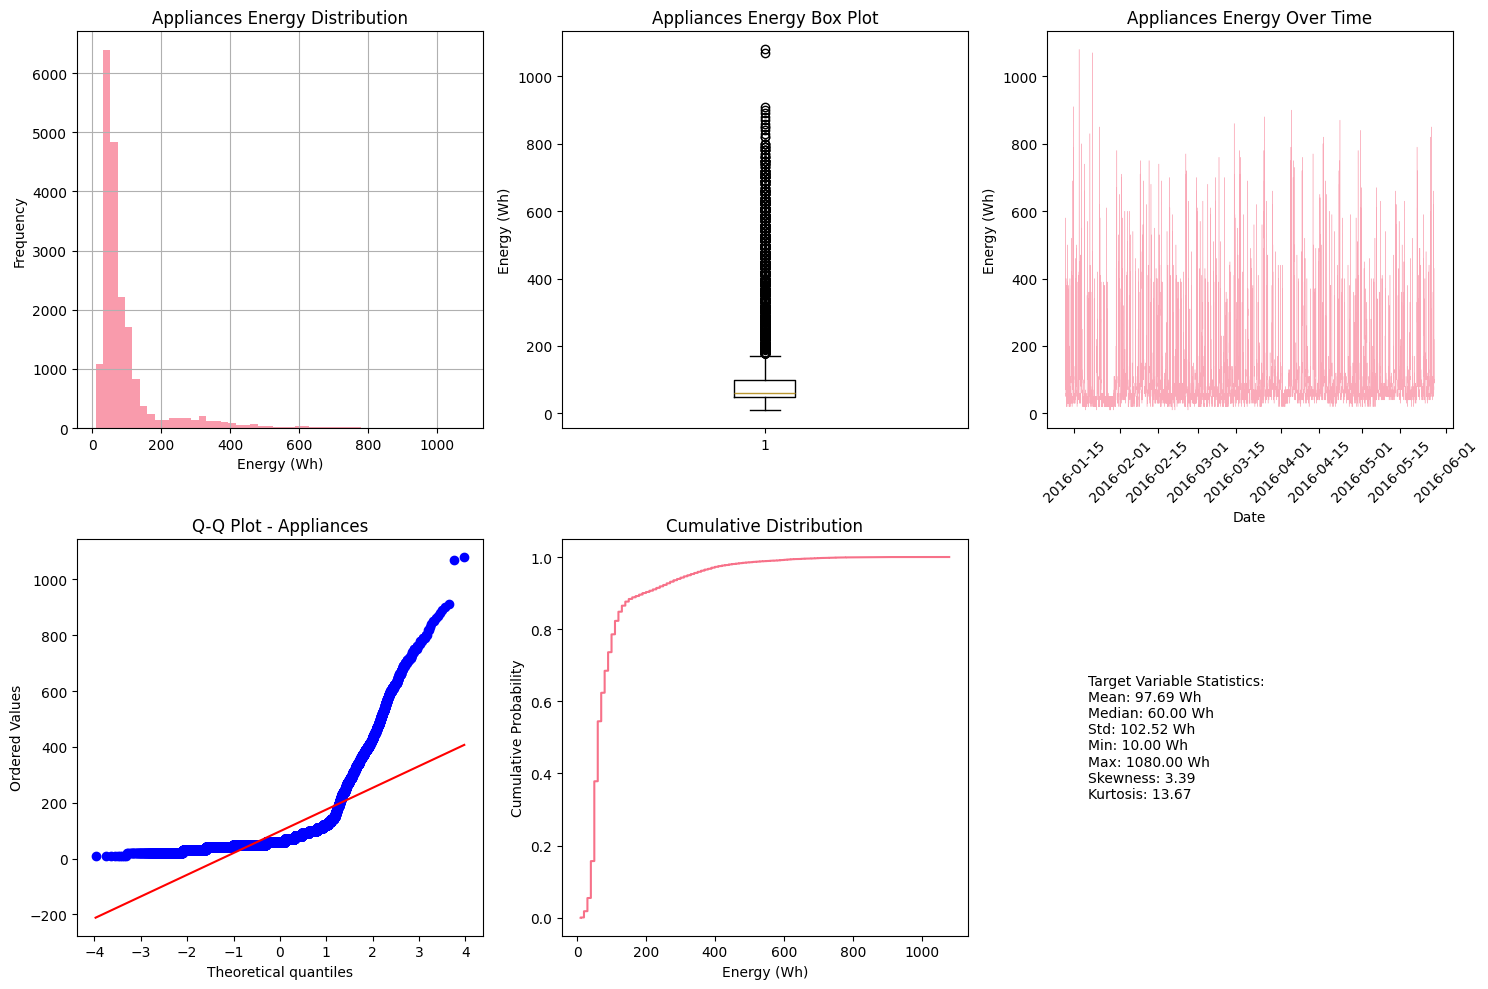

In [5]:
print("=== TARGET VARIABLE ANALYSIS (Appliances) ===")

plt.figure(figsize=(15, 10))

# Distribution
plt.subplot(2, 3, 1)
df['Appliances'].hist(bins=50, alpha=0.7)
plt.title('Appliances Energy Distribution')
plt.xlabel('Energy (Wh)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(2, 3, 2)
plt.boxplot(df['Appliances'])
plt.title('Appliances Energy Box Plot')
plt.ylabel('Energy (Wh)')

# Time series plot
plt.subplot(2, 3, 3)
plt.plot(df['date'], df['Appliances'], alpha=0.6, linewidth=0.3)
plt.title('Appliances Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (Wh)')
plt.xticks(rotation=45)

# Q-Q plot
plt.subplot(2, 3, 4)
stats.probplot(df['Appliances'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Appliances')

# Cumulative distribution
plt.subplot(2, 3, 5)
sorted_appliances = np.sort(df['Appliances'])
p = np.arange(1, len(sorted_appliances) + 1) / len(sorted_appliances)
plt.plot(sorted_appliances, p)
plt.title('Cumulative Distribution')
plt.xlabel('Energy (Wh)')
plt.ylabel('Cumulative Probability')

# Statistics summary
plt.subplot(2, 3, 6)
plt.axis('off')
stats_text = f"""
Target Variable Statistics:
Mean: {df['Appliances'].mean():.2f} Wh
Median: {df['Appliances'].median():.2f} Wh
Std: {df['Appliances'].std():.2f} Wh
Min: {df['Appliances'].min():.2f} Wh
Max: {df['Appliances'].max():.2f} Wh
Skewness: {df['Appliances'].skew():.2f}
Kurtosis: {df['Appliances'].kurtosis():.2f}
"""
plt.text(0.1, 0.5, stats_text, fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()

1. **Histogram** :
The histogram illustrates the distribution of appliance energy consumption across different energy ranges. It shows a right-skewed pattern, where most of the consumption values are concentrated in the lower ranges. As the energy usage increases, the frequency of occurrence significantly decreases. A large portion of the data lies within the first few bins, suggesting that lower energy usage is more common, while higher values are rare and less frequent.

2. **Box Plo**t :
The box plot highlights the spread and central tendency of the energy consumption data. It shows that the data is positively skewed, with the median closer to the lower quartile. The presence of a large number of outliers above the upper whisker indicates occasional high energy usage spikes. The interquartile range shows that most of the typical energy usage lies within a relatively narrow band, while a substantial number of extreme values are scattered far above.

3. **Time Series Plot** :
The time series plot visualizes the variation in appliance energy consumption over the recorded time period. The pattern appears irregular, with frequent fluctuations indicating dynamic usage behavior. There are no clear seasonal or daily trends visible, but sporadic peaks suggest occasional high consumption events that deviate from the usual pattern.

4. **Q-Q Plot** :
The Q-Q plot compares the distribution of the energy consumption data with a theoretical normal distribution. It shows that the data deviates significantly from normality, especially in the upper tail. The points curve upward, confirming heavy skewness and the presence of high-value outliers, indicating that the data follows a non-normal, heavy-tailed distribution.

5. **Cumulative Distribution Plot** :
The cumulative distribution plot shows how the energy usage accumulates across the dataset. The curve starts off gradually, then rises steeply in the mid-range before leveling off at higher values. This indicates that the majority of energy usage values are sharp increase in cumulative frequency in the mid-range, and very few data points contributing to the upper tail.

# Time-Based Pattern Analysis

=== TIME-BASED PATTERN ANALYSIS ===
Peak usage hours:
hour
18    190.364520
17    161.352657
19    143.065693
11    133.126521
20    126.982968
Name: Appliances, dtype: float64


<ipython-input-6-df962abc0408>:66: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_mean = df.set_index('date')['Appliances'].rolling(window='24H').mean()


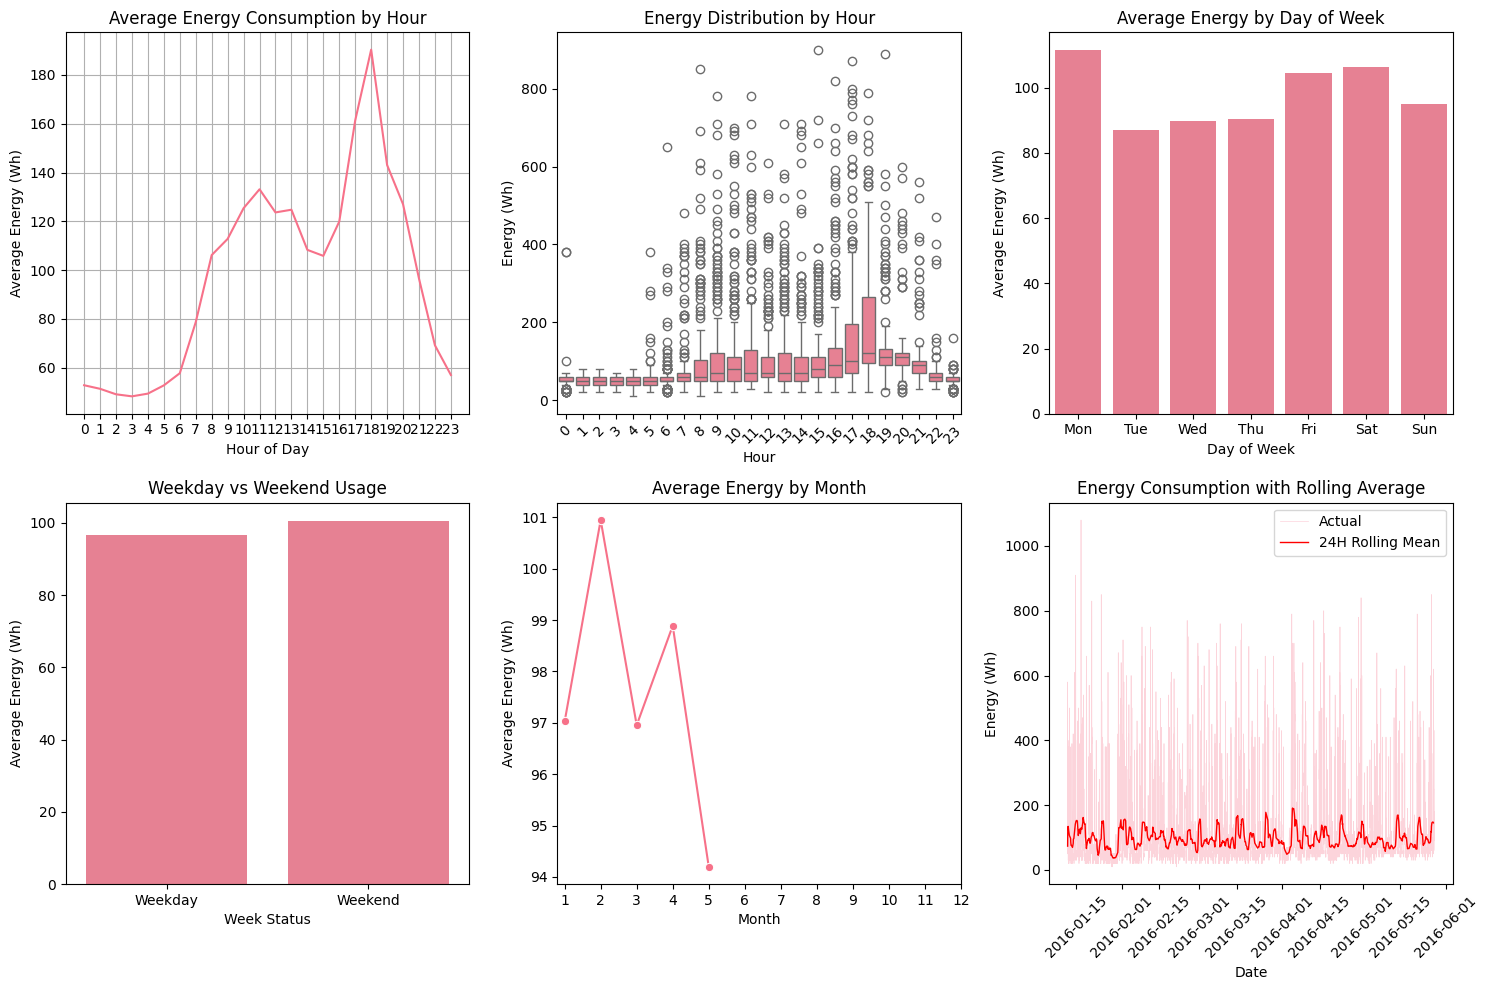

In [6]:
print("=== TIME-BASED PATTERN ANALYSIS ===")

# Create time-based features for analysis
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['date'].dt.month
df['WeekStatus'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Hourly patterns
plt.figure(figsize=(15, 10))

# Average energy by hour
plt.subplot(2, 3, 1)
hourly_avg = df.groupby('hour')['Appliances'].mean()
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy (Wh)')
plt.grid(True)
plt.xticks(range(0, 24))

print("Peak usage hours:")
print(hourly_avg.sort_values(ascending=False).head())

# Box plot by hour
plt.subplot(2, 3, 2)
sns.boxplot(x='hour', y='Appliances', data=df.sample(n=min(5000, len(df))))  # Sample for performance
plt.title('Energy Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Energy (Wh)')
plt.xticks(rotation=45)

# Daily patterns
plt.subplot(2, 3, 3)
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_avg = df.groupby('day_of_week')['Appliances'].mean()
sns.barplot(x=daily_avg.index, y=daily_avg.values)
plt.title('Average Energy by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy (Wh)')
plt.xticks(ticks=range(7), labels=day_labels)

# Weekday vs Weekend
plt.subplot(2, 3, 4)
week_usage = df.groupby('WeekStatus')['Appliances'].mean()
sns.barplot(x=week_usage.index, y=week_usage.values)
plt.title('Weekday vs Weekend Usage')
plt.xlabel('Week Status')
plt.ylabel('Average Energy (Wh)')

# Monthly patterns
plt.subplot(2, 3, 5)
monthly_avg = df.groupby('month')['Appliances'].mean()
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Energy by Month')
plt.xlabel('Month')
plt.ylabel('Average Energy (Wh)')
plt.xticks(range(1, 13))

# Time series with rolling average
plt.subplot(2, 3, 6)
# Sample data for better visualization
sample_df = df.sample(n=min(10000, len(df))).sort_values('date')
plt.plot(sample_df['date'], sample_df['Appliances'], alpha=0.3, linewidth=0.5, label='Actual')
# Calculate rolling mean
rolling_mean = df.set_index('date')['Appliances'].rolling(window='24H').mean()
sample_rolling = rolling_mean.sample(n=min(1000, len(rolling_mean))).sort_index()
plt.plot(sample_rolling.index, sample_rolling.values, color='red', linewidth=1, label='24H Rolling Mean')
plt.title('Energy Consumption with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

According to the charts, appliance energy consumption follows a clear time-based pattern.

*   The "Average Energy Consumption by Hour" chart shows that usage is lowest during early morning hours (2 AM–5 AM) and gradually rises, peaking between 5 PM and 8 PM, with 6 PM showing the highest average.
*   The "Energy Distribution by Hour" boxplot confirms this pattern, highlighting greater variability and higher peaks during evening hours.
*   The "Average Energy by Day of Week" chart reveals that Monday has the highest average usage, followed by Friday and Saturday, while Tuesday through Thursday are generally lower.
*   The "Weekday vs Weekend Usage" chart shows slightly higher energy use on weekends than weekdays.
*   The "Average Energy by Month" chart indicates relatively stable monthly usage, with a slight peak in February and a dip in May.
*   The "Energy Consumption with Rolling Average" time series plot illustrates how actual usage fluctuates over time, with a smoothed trend line showing consistent daily cycles and occasional peaks. Overall, the charts reveal that energy use is driven by daily human activity patterns, with evenings and weekends being the most energy-intensive periods.




# Temperature Analysis

=== TEMPERATURE ANALYSIS ===


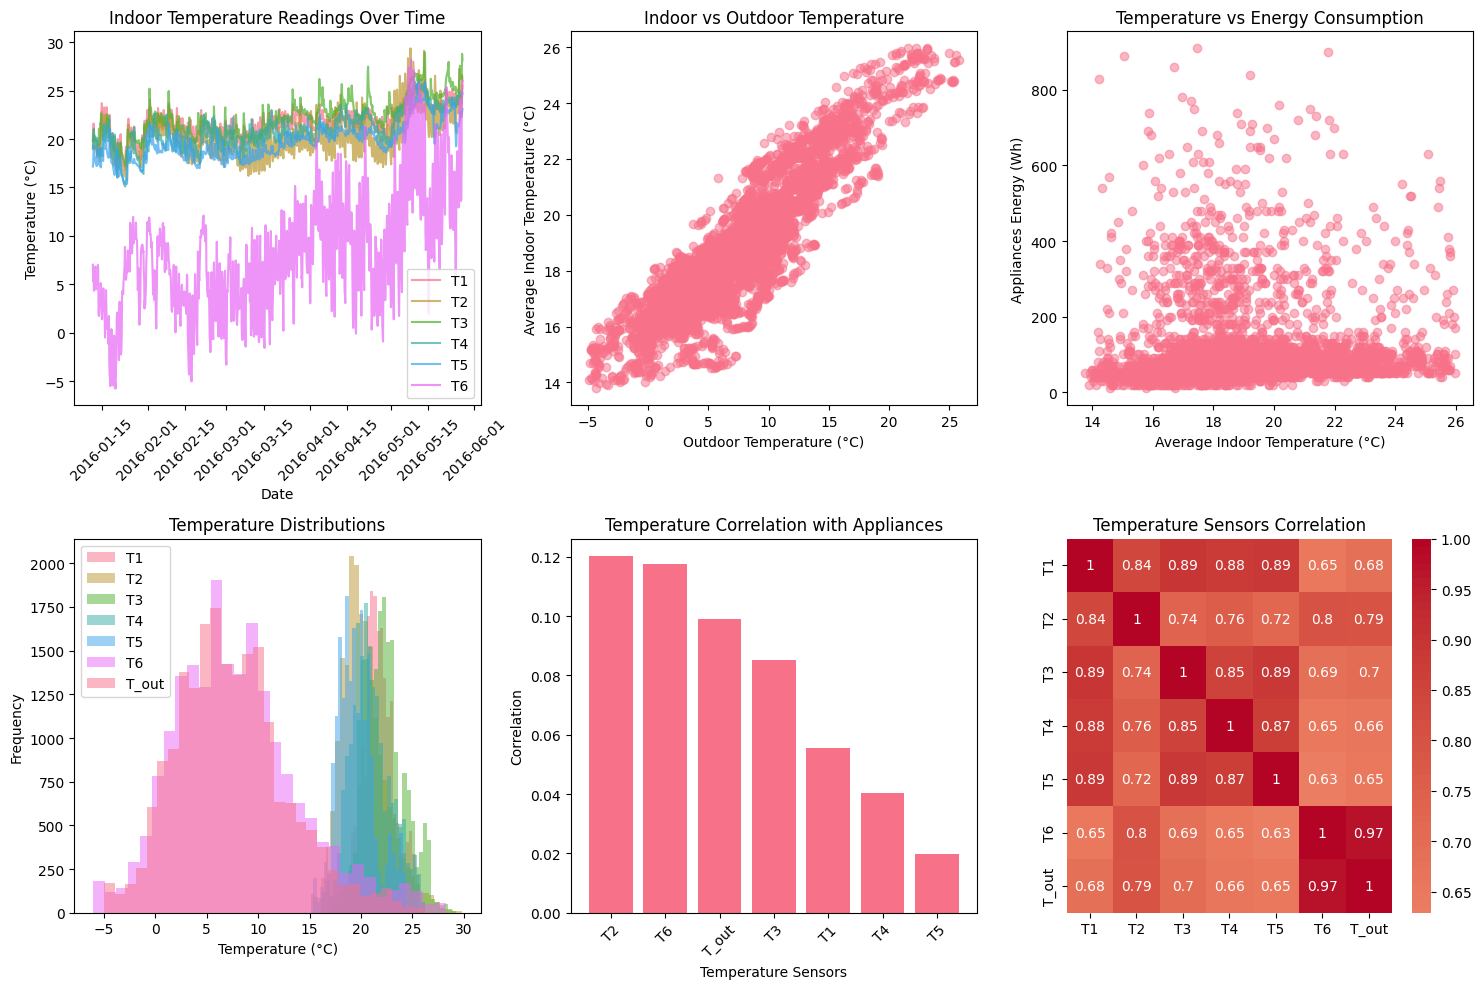

Temperature correlation with Appliances:
T2       0.120073
T6       0.117638
T_out    0.099155
T3       0.085060
T1       0.055447
T4       0.040281
T5       0.019760
Name: Appliances, dtype: float64


In [7]:
print("=== TEMPERATURE ANALYSIS ===")

temp_cols = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T_out']

plt.figure(figsize=(15, 10))

# Indoor temperature readings over time
plt.subplot(2, 3, 1)
sample_indices = np.arange(0, len(df), max(1, len(df)//1000))  # Sample for performance
for temp in ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']:
    plt.plot(df['date'].iloc[sample_indices], df[temp].iloc[sample_indices], alpha=0.7, label=temp)
plt.title('Indoor Temperature Readings Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)

# Indoor vs Outdoor temperature
plt.subplot(2, 3, 2)
indoor_avg = df[['T1', 'T2', 'T3', 'T4', 'T5', 'T6']].mean(axis=1)
sample_idx = np.random.choice(len(df), min(5000, len(df)), replace=False)
plt.scatter(df['T_out'].iloc[sample_idx], indoor_avg.iloc[sample_idx], alpha=0.5)
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Average Indoor Temperature (°C)')
plt.title('Indoor vs Outdoor Temperature')

# Temperature vs Energy consumption
plt.subplot(2, 3, 3)
plt.scatter(indoor_avg.iloc[sample_idx], df['Appliances'].iloc[sample_idx], alpha=0.5)
plt.xlabel('Average Indoor Temperature (°C)')
plt.ylabel('Appliances Energy (Wh)')
plt.title('Temperature vs Energy Consumption')

# Temperature distributions
plt.subplot(2, 3, 4)
for temp in temp_cols:
    plt.hist(df[temp], bins=30, alpha=0.5, label=temp)
plt.title('Temperature Distributions')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()

# Temperature correlation with appliances
plt.subplot(2, 3, 5)
temp_corr = df[temp_cols + ['Appliances']].corr()['Appliances'][:-1].sort_values(ascending=False)
plt.bar(range(len(temp_corr)), temp_corr.values)
plt.title('Temperature Correlation with Appliances')
plt.xlabel('Temperature Sensors')
plt.ylabel('Correlation')
plt.xticks(range(len(temp_corr)), temp_corr.index, rotation=45)

# Temperature correlation heatmap
plt.subplot(2, 3, 6)
temp_corr_matrix = df[temp_cols].corr()
sns.heatmap(temp_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Temperature Sensors Correlation')

plt.tight_layout()
plt.show()

print("Temperature correlation with Appliances:")
print(temp_corr.sort_values(ascending=False))


According to the charts,


*   T2  has the strongest positive correlation with energy consumption.
*   T6  and T_out also show moderate correlation.

*   Other sensors (T3, T1, T4, T5) have lower correlations, indicating weaker influence.
*   T1–T3, T1–T5 , T3–T5 : Highly correlated indoor sensors.

*   T6–T_out : Very strong correlation, both likely influenced by external environment.
*   Most indoor sensors (T1–T5) are highly interrelated.


# Humidity Analysis

=== HUMIDITY ANALYSIS ===


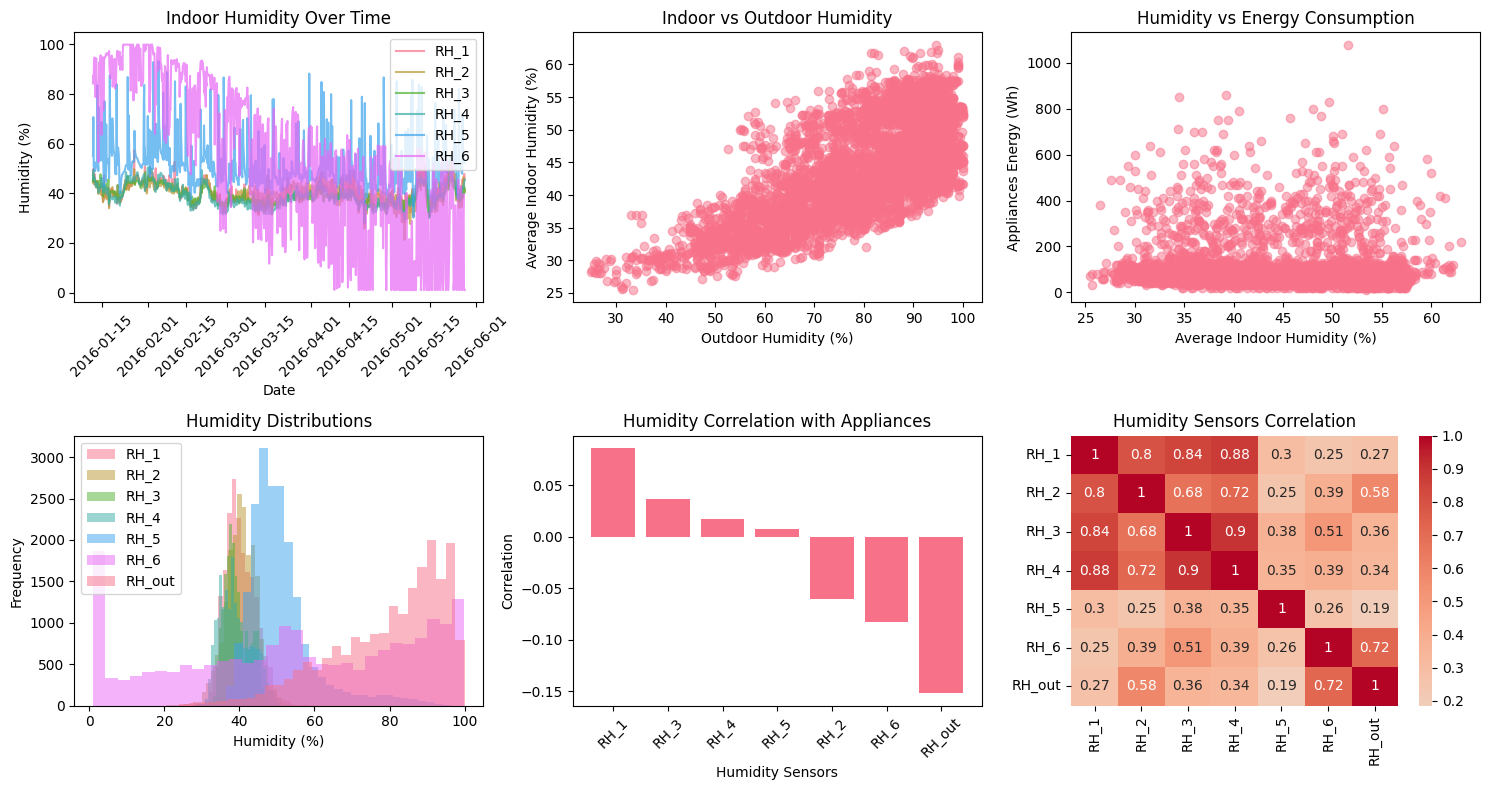

Humidity correlation with Appliances:
RH_1      0.086031
RH_3      0.036292
RH_4      0.016965
RH_5      0.006955
RH_2     -0.060465
RH_6     -0.083178
RH_out   -0.152282
Name: Appliances, dtype: float64


In [8]:
print("=== HUMIDITY ANALYSIS ===")

humidity_cols = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_out']

plt.figure(figsize=(15, 8))

# Humidity over time
plt.subplot(2, 3, 1)
sample_indices = np.arange(0, len(df), max(1, len(df)//1000))
for rh in ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6']:
    plt.plot(df['date'].iloc[sample_indices], df[rh].iloc[sample_indices], alpha=0.7, label=rh)
plt.title('Indoor Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.xticks(rotation=45)

# Indoor vs Outdoor humidity
plt.subplot(2, 3, 2)
indoor_rh_avg = df[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6']].mean(axis=1)
sample_idx = np.random.choice(len(df), min(5000, len(df)), replace=False)
plt.scatter(df['RH_out'].iloc[sample_idx], indoor_rh_avg.iloc[sample_idx], alpha=0.5)
plt.xlabel('Outdoor Humidity (%)')
plt.ylabel('Average Indoor Humidity (%)')
plt.title('Indoor vs Outdoor Humidity')

# Humidity vs Energy
plt.subplot(2, 3, 3)
plt.scatter(indoor_rh_avg.iloc[sample_idx], df['Appliances'].iloc[sample_idx], alpha=0.5)
plt.xlabel('Average Indoor Humidity (%)')
plt.ylabel('Appliances Energy (Wh)')
plt.title('Humidity vs Energy Consumption')

# Humidity distributions
plt.subplot(2, 3, 4)
for rh in humidity_cols:
    plt.hist(df[rh], bins=30, alpha=0.5, label=rh)
plt.title('Humidity Distributions')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.legend()

# Humidity correlation with appliances
plt.subplot(2, 3, 5)
humidity_corr = df[humidity_cols + ['Appliances']].corr()['Appliances'][:-1].sort_values(ascending=False)
plt.bar(range(len(humidity_corr)), humidity_corr.values)
plt.title('Humidity Correlation with Appliances')
plt.xlabel('Humidity Sensors')
plt.ylabel('Correlation')
plt.xticks(range(len(humidity_corr)), humidity_corr.index, rotation=45)

# Humidity correlation heatmap
plt.subplot(2, 3, 6)
humidity_corr_matrix = df[humidity_cols].corr()
sns.heatmap(humidity_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Humidity Sensors Correlation')

plt.tight_layout()
plt.show()

print("Humidity correlation with Appliances:")
print(humidity_corr.sort_values(ascending=False))

1. Indoor Humidity Over Time :
The indoor humidity levels from six sensors (RH_1 to RH_6) were sampled over several timestamps. Values generally ranged from mid-40% to mid-50% for indoor sensors, with RH_6 often showing higher humidity readings . Outdoor humidity (RH_out) varied between 77% to 93%, indicating consistently higher moisture levels outside compared to indoors.

2. Indoor vs Outdoor Humidity Relationship :
Scatter analysis of 5000 samples shows a moderate relationship between outdoor humidity and average indoor humidity (mean indoor humidity approx. 31% to 57%). Indoor humidity tends to be lower and less variable than outdoor humidity, which fluctuates widely.

3. Humidity vs Energy Consumption :
The average indoor humidity and appliance energy usage (Wh) show no strong direct correlation but some variation. Energy consumption ranges from 50 Wh to 230 Wh across different indoor humidity levels, suggesting other factors influence energy use beyond humidity alone.

4. Humidity Distribution :
Mean indoor sensor humidity ranges from (RH_4) to (RH_6).
RH_6 shows the largest standard deviation indicating high variability.
Outdoor humidity averages nearly 80%, with less spread than some indoor sensors.
Minimum indoor humidity values can be as low as (RH_2), while maximums reach just over 60%.

5. Correlation of Humidity Sensors with Appliance Energy :
RH_1 has a weak positive correlation  with appliance energy use.
RH_3 and RH_4 show very weak positive correlations .
RH_2, RH_6, and outdoor humidity (RH_out) have negative correlations with energy use, with RH_out showing the strongest negative correlation.

6. Sensor-to-Sensor Correlations :
Indoor sensors show strong positive correlations among themselves (e.g., RH_1 and RH_4 ).
RH_6 correlates moderately with outdoor humidity, suggesting it may be more influenced by external conditions.
RH_5 exhibits weaker correlations with other sensors, implying localized or different environmental conditions near that sensor.

# Weather Features Analysis

=== WEATHER FEATURES ANALYSIS ===


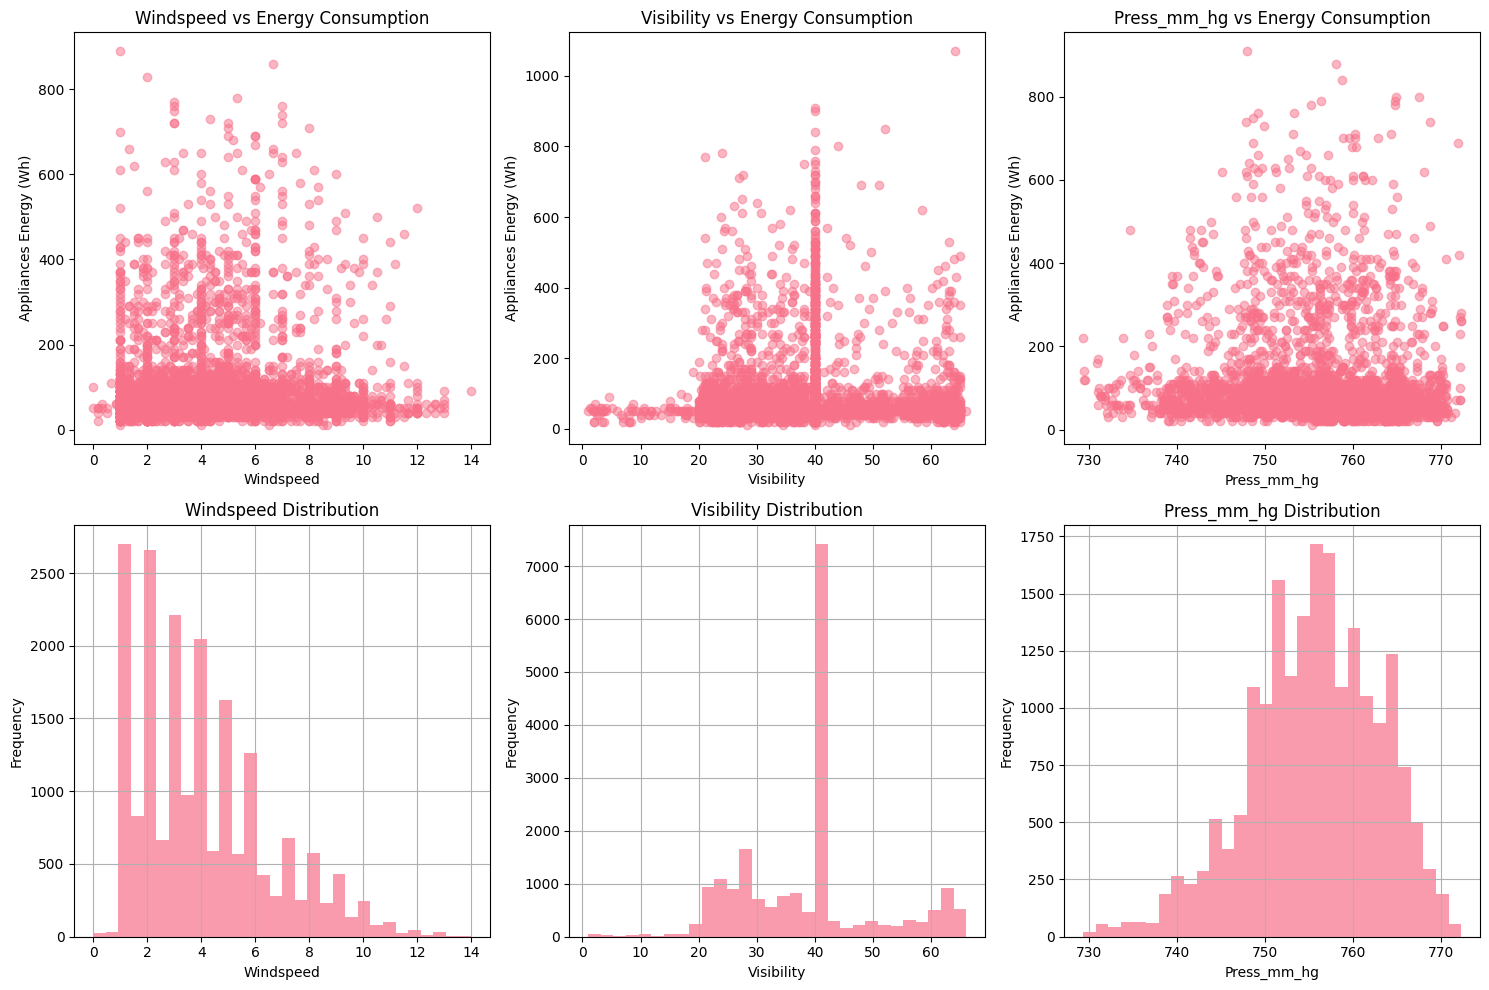

Weather correlation with Appliances:
Windspeed      0.087122
Visibility     0.000230
Press_mm_hg   -0.034885
Name: Appliances, dtype: float64


In [9]:
print("=== WEATHER FEATURES ANALYSIS ===")

weather_cols = ['Windspeed', 'Visibility', 'Press_mm_hg']

plt.figure(figsize=(15, 10))

# Weather vs Energy scatter plots
for i, col in enumerate(weather_cols, 1):
    plt.subplot(2, 3, i)
    sample_idx = np.random.choice(len(df), min(5000, len(df)), replace=False)
    plt.scatter(df[col].iloc[sample_idx], df['Appliances'].iloc[sample_idx], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Appliances Energy (Wh)')
    plt.title(f'{col} vs Energy Consumption')

# Weather feature distributions
for i, col in enumerate(weather_cols, 4):
    plt.subplot(2, 3, i)
    df[col].hist(bins=30, alpha=0.7)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Weather correlation with appliances
weather_corr = df[weather_cols + ['Appliances']].corr()['Appliances'][:-1].sort_values(ascending=False)
print("Weather correlation with Appliances:")
print(weather_corr)

Weather Sensor Readings Over Time :
Windspeed tends to stay low to moderate, visibility mostly remains clear with occasional drops, and pressure is generally stable with slight fluctuations. These weather features show typical environmental changes without extreme variations.

Weather vs Appliance Energy Usage :
The scatter plots reveal that appliance energy consumption does not follow any clear pattern with windspeed, visibility, or pressure. The points are widely scattered, showing no strong visual relationship.

Weather Feature Distributions :
Windspeed is mostly concentrated at lower levels. Visibility tends to cluster around a common range but occasionally dips lower. Pressure values form a smooth distribution centered around a consistent average, with slight variation on either side.

Correlation with Appliance Energy Consumption :
Weather features have little to no relationship with energy usage. Windspeed shows a very weak positive connection, visibility is almost unrelated, and pressure has a slightly negative but still weak link.

Conclusion: Weather Impact on Energy Usage :
Weather conditions appear to have minimal influence on how much energy appliances consume. Other factors, such as indoor climate or human activity, likely play a more significant role.

# Comprehensive Correlation Analysis

=== COMPREHENSIVE CORRELATION ANALYSIS ===


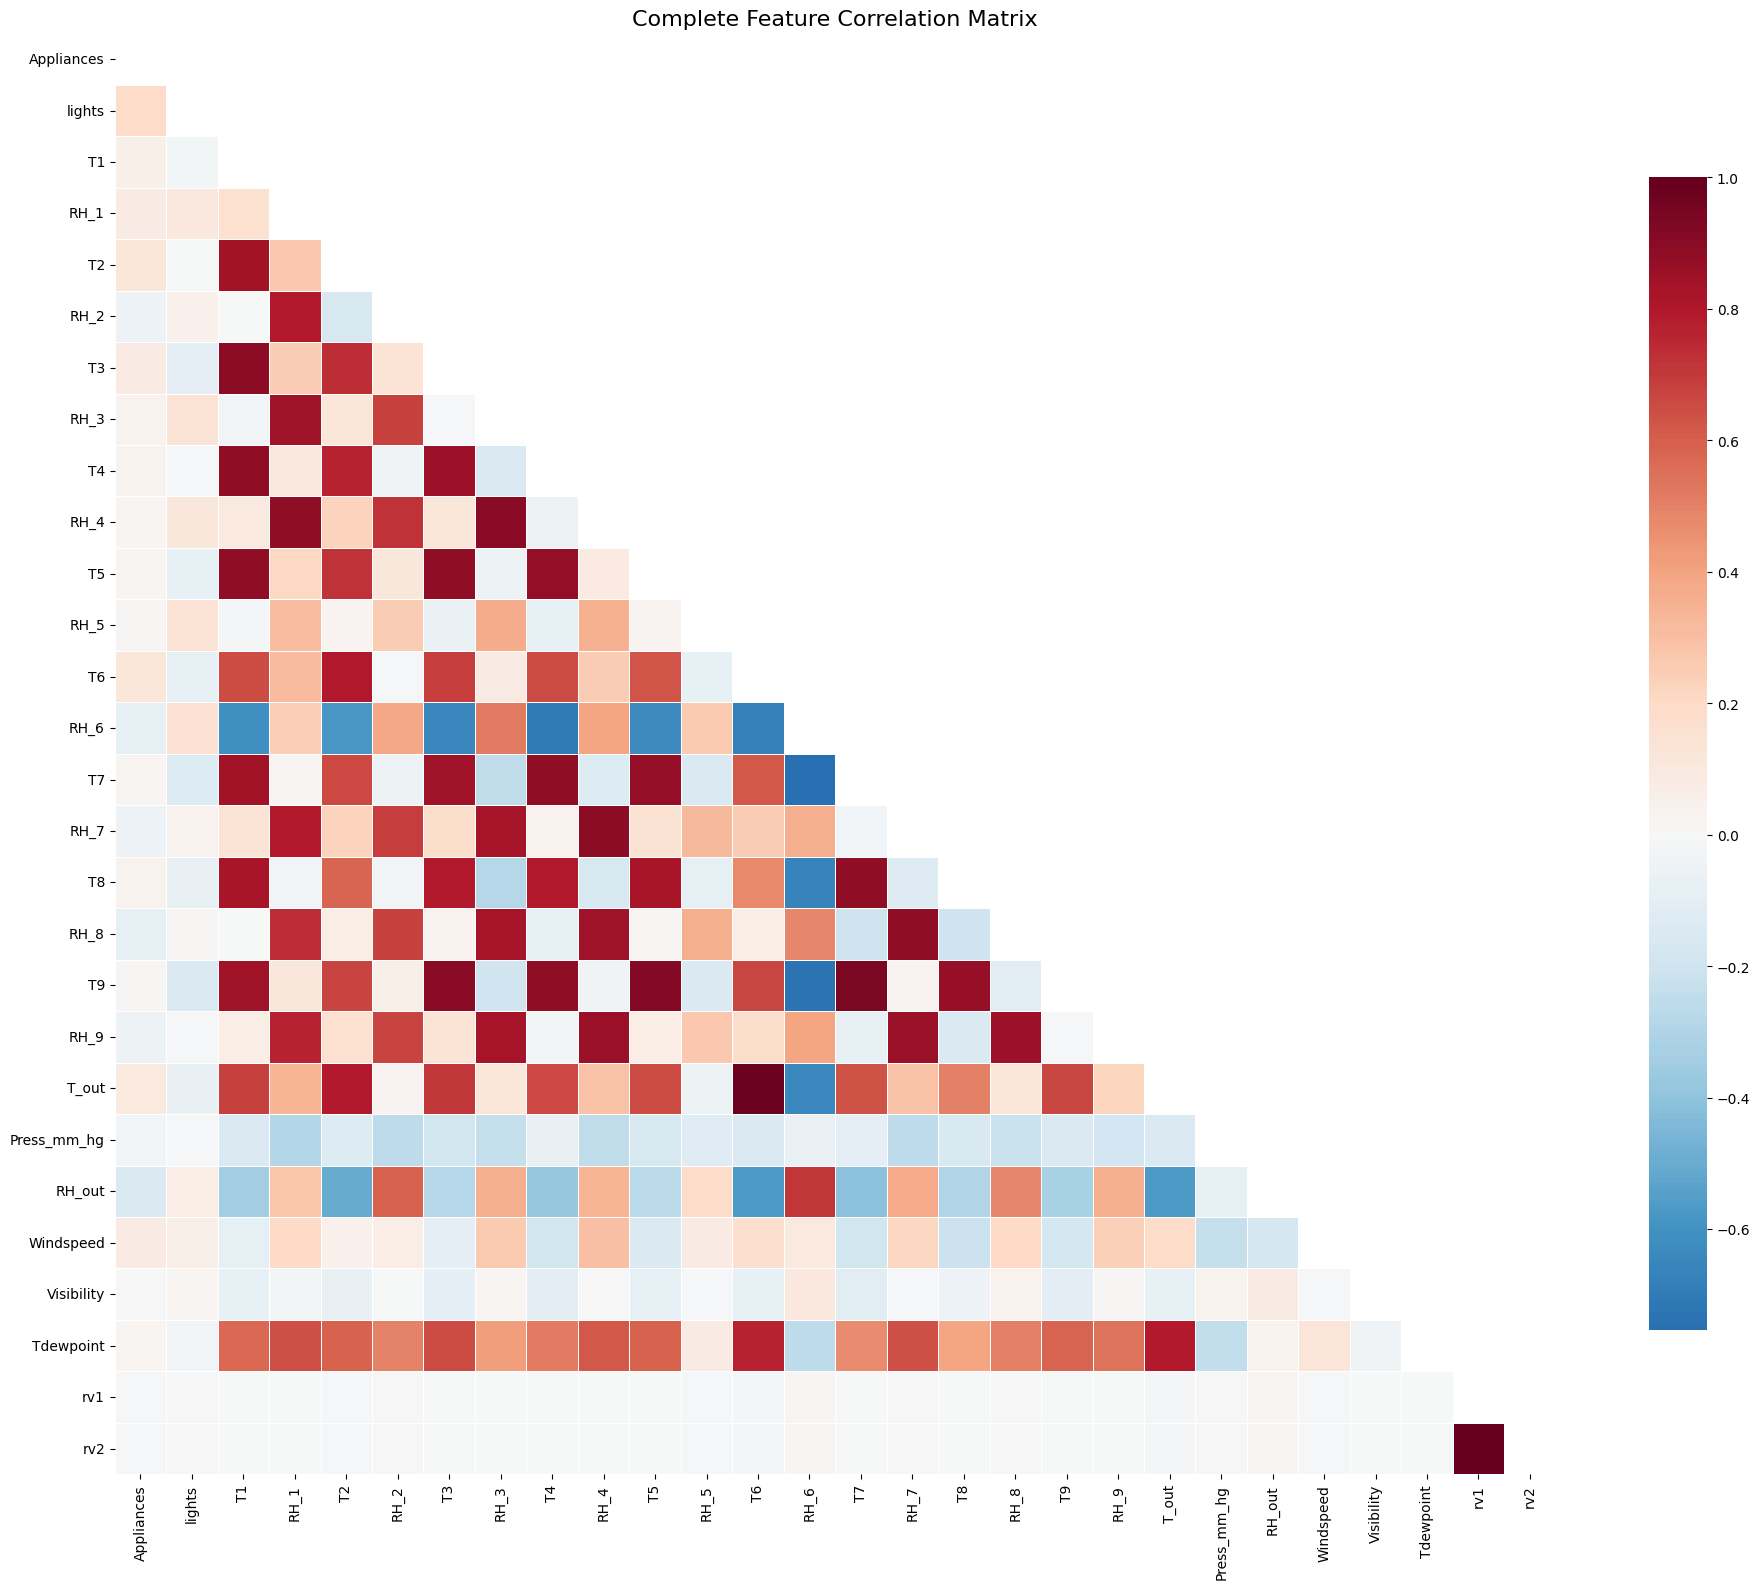

Top 15 features correlated with Appliances:
lights       0.197278
RH_out       0.152282
T2           0.120073
T6           0.117638
T_out        0.099155
RH_8         0.094039
Windspeed    0.087122
RH_1         0.086031
T3           0.085060
RH_6         0.083178
RH_2         0.060465
RH_7         0.055642
T1           0.055447
RH_9         0.051462
T4           0.040281
Name: Appliances, dtype: float64

Highly correlated feature pairs (>0.8):
T1 - T2: 0.837
T1 - T3: 0.892
T1 - T4: 0.877
T1 - T5: 0.885
T1 - T7: 0.839
T1 - T8: 0.825
T1 - T9: 0.845
RH_1 - RH_3: 0.845
RH_1 - RH_4: 0.880
RH_1 - RH_7: 0.801

⚠️  Found 36 highly correlated pairs - consider feature selection!


In [10]:
print("=== COMPREHENSIVE CORRELATION ANALYSIS ===")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create enhanced correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Complete Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Top correlations with target variable
target_correlations = correlation_matrix['Appliances'].abs().sort_values(ascending=False)
print("Top 15 features correlated with Appliances:")
print(target_correlations[1:16])  # Exclude self-correlation

# Identify highly correlated feature pairs
def find_high_correlations(corr_matrix, threshold=0.8):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > threshold:
                high_corr_pairs.append((corr_matrix.columns[i],
                                      corr_matrix.columns[j],
                                      corr_val))
    return high_corr_pairs

# Exclude target variable for multicollinearity check
feature_corr_matrix = correlation_matrix.drop('Appliances', axis=0).drop('Appliances', axis=1)
high_corr = find_high_correlations(feature_corr_matrix, 0.8)

print(f"\nHighly correlated feature pairs (>0.8):")
for pair in high_corr[:10]:  # Show top 10
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

if len(high_corr) > 0:
    print(f"\n⚠️  Found {len(high_corr)} highly correlated pairs - consider feature selection!")
else:
    print("\n✅ No highly correlated features found")



rv1 and rv2 ≈ 0.0 correlation

These features have no linear relationship with other variables. They might not contribute much to prediction.

Visibility and Press_mm_hg between 0.0 and -0.2

These have a weak negative correlation with other variables. The relationship is minimal and might not be impactful.

RH_6 < -0.6 correlation

This shows a strong negative correlation, likely with energy consumption. As RH_6 increases, the target variable likely decreases. This feature could be significant in the model.

# Outlier Detection Analysis

=== OUTLIER DETECTION ANALYSIS ===
Appliances outliers (IQR method): 2138 (10.83%)
Appliances outliers (Z-score method): 540 (2.74%)
IQR bounds: Lower=-25.00, Upper=175.00


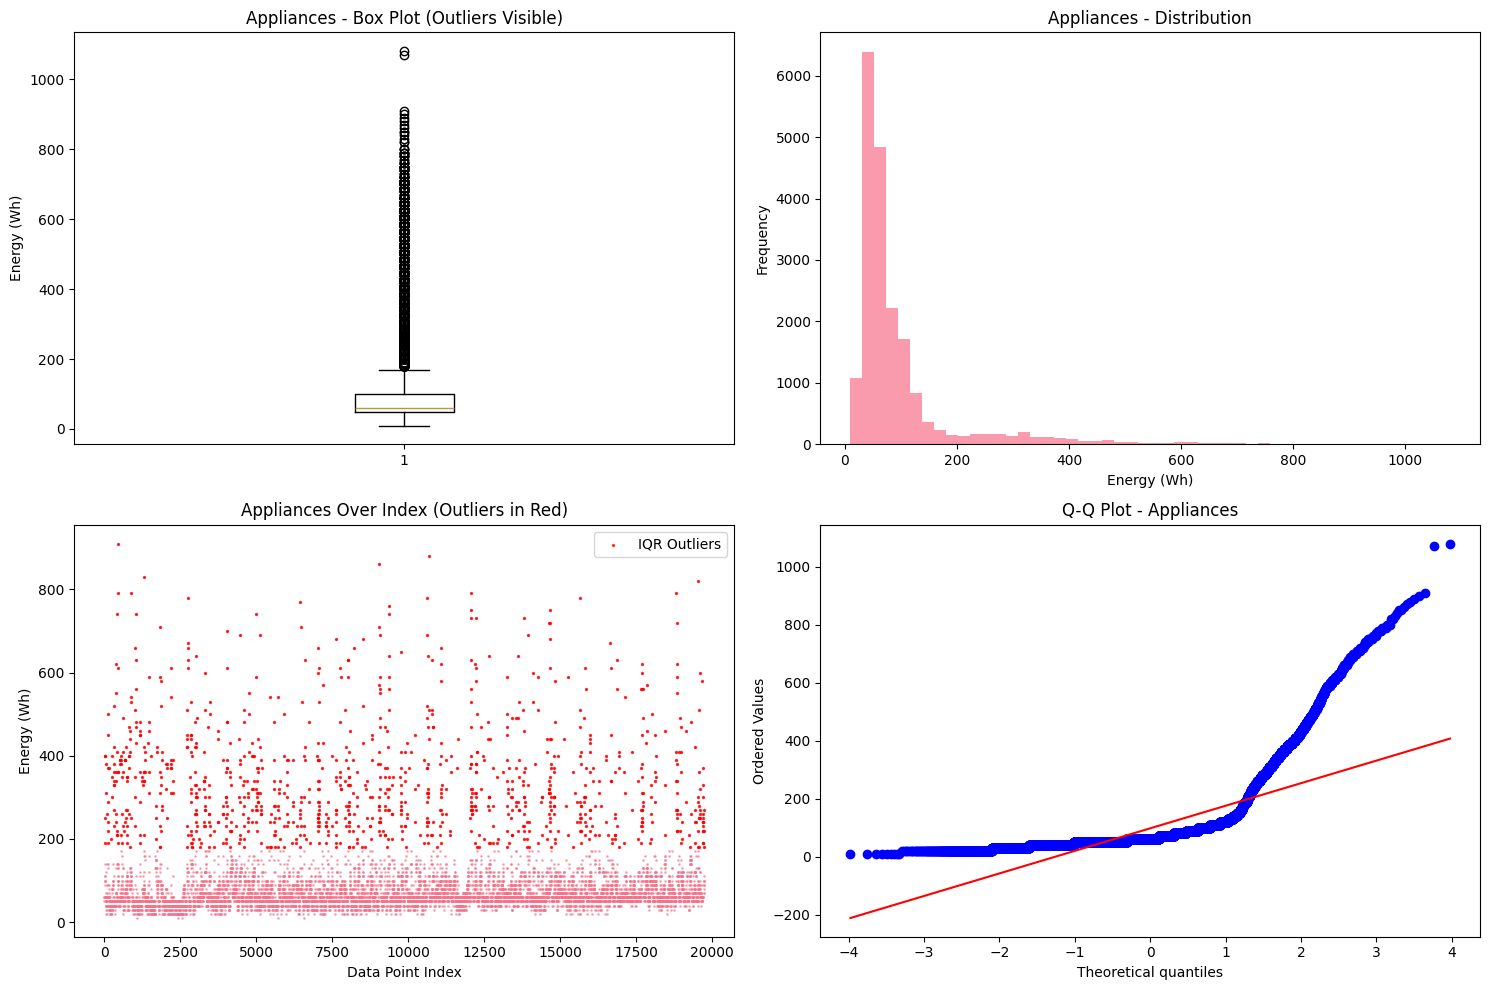

In [11]:
print("=== OUTLIER DETECTION ANALYSIS ===")

def detect_outliers_iqr(series):
    """Detect outliers using IQR method"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(series, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(series))
    outliers = series[z_scores > threshold]
    return outliers

# Analyze outliers in target variable
appliances_outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df['Appliances'])
appliances_outliers_zscore = detect_outliers_zscore(df['Appliances'])

print(f"Appliances outliers (IQR method): {len(appliances_outliers_iqr)} ({len(appliances_outliers_iqr)/len(df)*100:.2f}%)")
print(f"Appliances outliers (Z-score method): {len(appliances_outliers_zscore)} ({len(appliances_outliers_zscore)/len(df)*100:.2f}%)")
print(f"IQR bounds: Lower={lower_bound:.2f}, Upper={upper_bound:.2f}")

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plot
axes[0,0].boxplot(df['Appliances'])
axes[0,0].set_title('Appliances - Box Plot (Outliers Visible)')
axes[0,0].set_ylabel('Energy (Wh)')

# Histogram
axes[0,1].hist(df['Appliances'], bins=50, alpha=0.7)
axes[0,1].set_title('Appliances - Distribution')
axes[0,1].set_xlabel('Energy (Wh)')
axes[0,1].set_ylabel('Frequency')

# Scatter plot with outliers highlighted
sample_size = min(10000, len(df))
sample_indices = np.random.choice(len(df), sample_size, replace=False)
axes[1,0].scatter(sample_indices, df['Appliances'].iloc[sample_indices], alpha=0.5, s=1)
outlier_indices = appliances_outliers_iqr.index.intersection(sample_indices)
if len(outlier_indices) > 0:
    axes[1,0].scatter(outlier_indices, df['Appliances'].loc[outlier_indices],
                     color='red', alpha=0.7, s=2, label='IQR Outliers')
axes[1,0].set_title('Appliances Over Index (Outliers in Red)')
axes[1,0].set_xlabel('Data Point Index')
axes[1,0].set_ylabel('Energy (Wh)')
axes[1,0].legend()

# Q-Q plot
stats.probplot(df['Appliances'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot - Appliances')

plt.tight_layout()
plt.show()

Outlier detection on the Appliances energy consumption variable revealed that using the IQR method, there are 2138 outliers, which account for 10.83% of the dataset. These are values falling outside the IQR bounds of -25.00 to 175.00 Wh. The Z-score method detected 540 outliers, representing 2.74% of the data.

Conclusion:
The dataset contains a significant number of high energy consumption values that lie far outside the typical range. These outliers may distort model performance if not addressed properly. Therefore, it is recommended to apply preprocessing techniques such as outlier removal, capping, or transformation to enhance model accuracy and ensure better generalization.

# EDA Summary and Insights

In [12]:

print("EXPLORATORY DATA ANALYSIS SUMMARY")


print(f"\n DATASET OVERVIEW:")
print(f"   • Total records: {len(df):,}")
print(f"   • Features: {len(df.columns)}")
print(f"   • Date range: {df['date'].min()} to {df['date'].max()}")
print(f"   • Duration: {(df['date'].max() - df['date'].min()).days} days")

print(f"\n TARGET VARIABLE INSIGHTS:")
print(f"   • Mean energy consumption: {df['Appliances'].mean():.2f} Wh")
print(f"   • Energy range: {df['Appliances'].min():.0f} - {df['Appliances'].max():.0f} Wh")
print(f"   • Distribution: {'Right-skewed' if df['Appliances'].skew() > 0 else 'Left-skewed'} (skew: {df['Appliances'].skew():.2f})")

print(f"\n TEMPORAL PATTERNS:")
peak_hour = hourly_avg.idxmax()
peak_day = daily_avg.idxmax()
print(f"   • Peak usage hour: {peak_hour}:00 ({hourly_avg[peak_hour]:.1f} Wh)")
print(f"   • Peak usage day: {day_labels[peak_day]} ({daily_avg[peak_day]:.1f} Wh)")
print(f"   • Weekend vs Weekday: {week_usage['Weekend']:.1f} vs {week_usage['Weekday']:.1f} Wh")

print(f"\n ENVIRONMENTAL CORRELATIONS:")
top_temp_corr = temp_corr.abs().max()
top_humidity_corr = humidity_corr.abs().max()
top_weather_corr = weather_corr.abs().max()
print(f"   • Strongest temperature correlation: {top_temp_corr:.3f}")
print(f"   • Strongest humidity correlation: {top_humidity_corr:.3f}")
print(f"   • Strongest weather correlation: {top_weather_corr:.3f}")

print(f"\n DATA QUALITY:")
print(f"   • Missing values: {'None' if df.isnull().sum().sum() == 0 else df.isnull().sum().sum()}")
print(f"   • Outliers (IQR): {len(appliances_outliers_iqr)} ({len(appliances_outliers_iqr)/len(df)*100:.1f}%)")
print(f"   • Highly correlated pairs: {len(high_corr)}")




EXPLORATORY DATA ANALYSIS SUMMARY

 DATASET OVERVIEW:
   • Total records: 19,735
   • Features: 33
   • Date range: 2016-01-11 17:00:00 to 2016-05-27 18:00:00
   • Duration: 137 days

 TARGET VARIABLE INSIGHTS:
   • Mean energy consumption: 97.69 Wh
   • Energy range: 10 - 1080 Wh
   • Distribution: Right-skewed (skew: 3.39)

 TEMPORAL PATTERNS:
   • Peak usage hour: 18:00 (190.4 Wh)
   • Peak usage day: Mon (111.5 Wh)
   • Weekend vs Weekday: 100.6 vs 96.6 Wh

 ENVIRONMENTAL CORRELATIONS:
   • Strongest temperature correlation: 0.120
   • Strongest humidity correlation: 0.152
   • Strongest weather correlation: 0.087

 DATA QUALITY:
   • Missing values: None
   • Outliers (IQR): 2138 (10.8%)
   • Highly correlated pairs: 36
